In [121]:
import pandas as pd
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import matplotlib.ticker as ticker

In [93]:
dataset = pd.read_csv('food_and_you_wave_5.csv')

dietDataX = dataset.iloc[:,[1,68,94,95,96,97,98]].astype(str)
dietDataY = dataset.iloc[:,[35]].astype(str)

dataset.iloc[:,[1,68,94,95,96,97,98]].head(10)

,age_dv,dietary,q2_14sub_dv,q2_14su2_dv,q2_14su3_dv,q2_14su4_dv,q2_14su5_dv
0,45-54,Not vegetarian/vegan,Once or twice a week,Less than once a month,Once a month,3-4 times a week,Less than once a month
1,65-74,Not vegetarian/vegan,Once or twice a week,Never,Once a month,Once or twice a week,Never
2,45-54,Not vegetarian/vegan,Less than once a month,Once or twice a week,Once or twice a week,3-4 times a week,Never
3,45-54,Not vegetarian/vegan,3-4 times a week,Once a month,Once or twice a week,3-4 times a week,Never
4,55-64,Not vegetarian/vegan,Once or twice a week,Once or twice a week,Once or twice a week,Once or twice a week,Never
5,55-64,Not vegetarian/vegan,Once or twice a week,Never,Once a month,Once or twice a week,Never
6,55-64,Not vegetarian/vegan,Once a month,Once a month,Once or twice a week,Once a month,Never
7,75+,Not vegetarian/vegan,Once or twice a week,Never,3-4 times a week,Once or twice a week,Never
8,55-64,Not vegetarian/vegan,Once or twice a week,Less than once a month,Once or twice a week,Once or twice a week,Never
9,65-74,Not vegetarian/vegan,Once or twice a week,Never,Less than once a month,Once or twice a week,Never


Text(0.5, 0, 'Dietary')

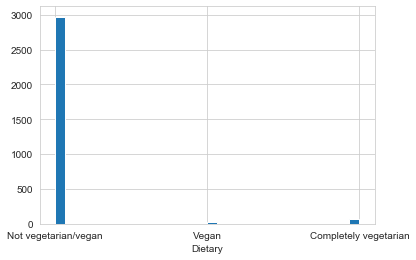

In [100]:
#sns.set_style('whitegrid')
dataset['dietary'].hist(bins=30)
plt.xlabel('Dietary')

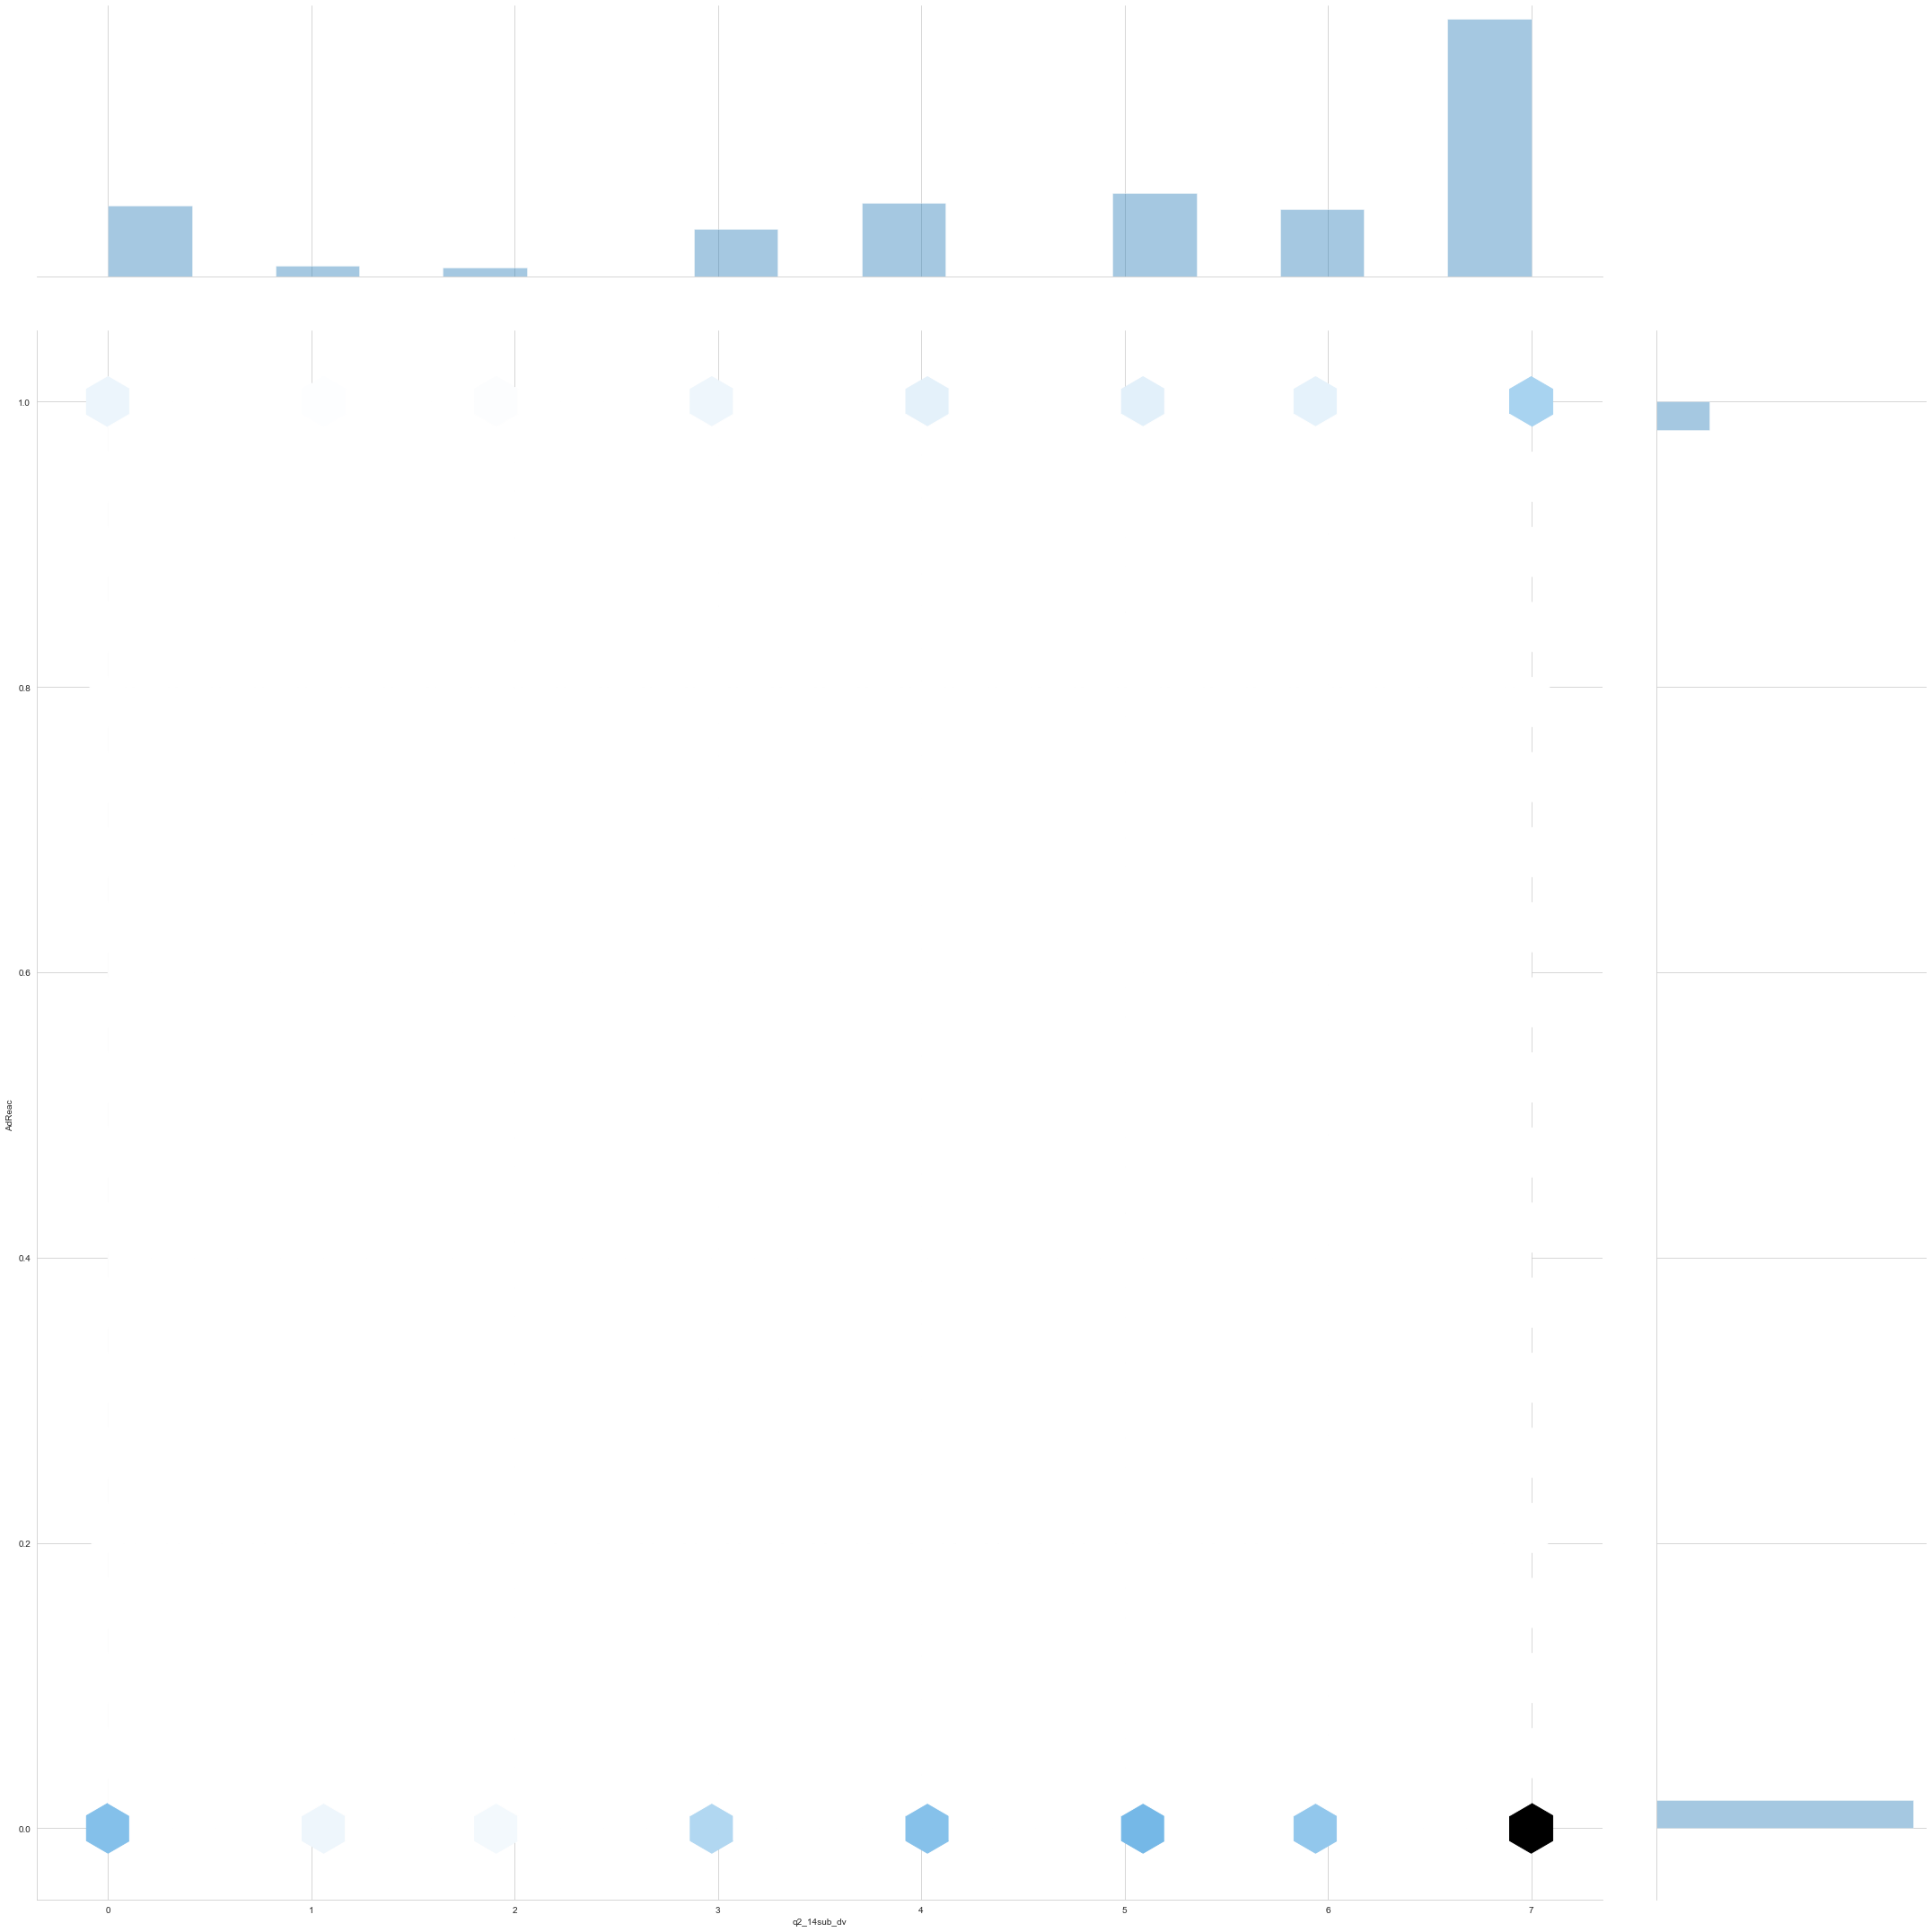

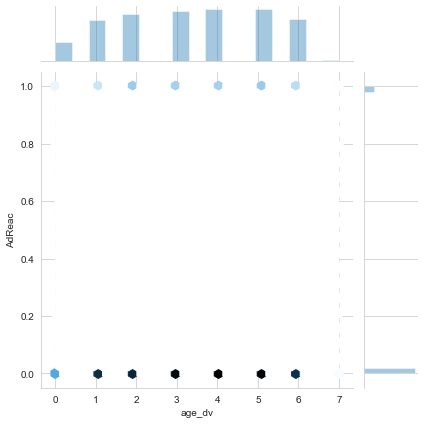

In [143]:
datagraph = dataset.iloc[:,[1,68,94,95,96,97,98,35]].astype(str)

le = preprocessing.LabelEncoder()
datagraph = datagraph.apply(le.fit_transform)

f=sns.jointplot(x='q2_14sub_dv',y='AdReac',data=datagraph, kind="hex", height=30)
f=sns.jointplot(x='age_dv',y='AdReac',data=datagraph, kind="hex")

In [90]:

le = preprocessing.LabelEncoder()
dietDataX = dietDataX.apply(le.fit_transform)
dietDataY = dietDataY.apply(le.fit_transform)
dietDataX.head(10)


,age_dv,dietary,q2_14sub_dv,q2_14su2_dv,q2_14su3_dv,q2_14su4_dv,q2_14su5_dv
0,3,1,7,3,6,0,2
1,5,1,7,4,6,7,3
2,3,1,3,7,7,0,3
3,3,1,0,6,7,0,3
4,4,1,7,7,7,7,3
5,4,1,7,4,6,7,3
6,4,1,6,6,7,6,3
7,6,1,7,4,0,7,3
8,4,1,7,3,7,7,3
9,5,1,7,4,3,7,3


Train on 2455 samples, validate on 614 samples
Epoch 1/50
2455/2455 [==============================] - 2s 927us/step - loss: 1.1451 - acc: 0.8106 - val_loss: 1.2642 - val_acc: 0.7948
Epoch 2/50
2455/2455 [==============================] - 0s 28us/step - loss: 1.1448 - acc: 0.8371 - val_loss: 1.2638 - val_acc: 0.7948
Epoch 3/50
2455/2455 [==============================] - 0s 28us/step - loss: 1.1449 - acc: 0.8371 - val_loss: 1.2640 - val_acc: 0.7948
Epoch 4/50
2455/2455 [==============================] - 0s 28us/step - loss: 1.1447 - acc: 0.8371 - val_loss: 1.2644 - val_acc: 0.7948
Epoch 5/50
2455/2455 [==============================] - 0s 29us/step - loss: 1.1446 - acc: 0.8371 - val_loss: 1.2660 - val_acc: 0.7948
Epoch 6/50
2455/2455 [==============================] - 0s 28us/step - loss: 1.1446 - acc: 0.8371 - val_loss: 1.2670 - val_acc: 0.7948
Epoch 7/50
2455/2455 [==============================] - 0s 27us/step - loss: 1.1443 - acc: 0.8371 - val_loss: 1.2656 - val_acc: 0.7948
Epoch 8

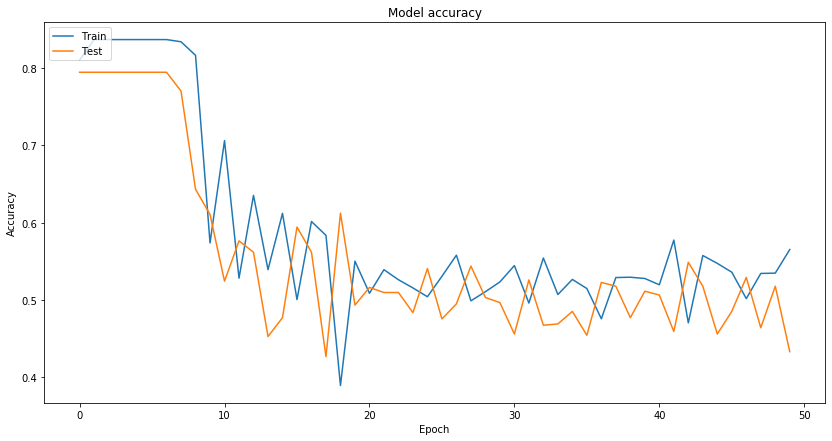

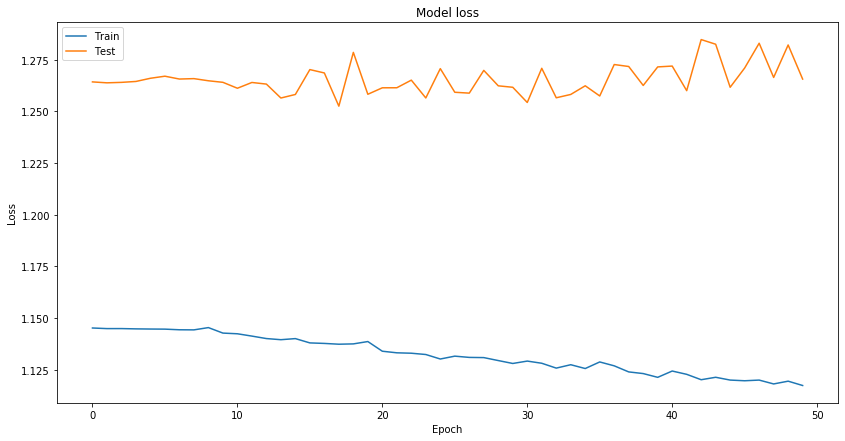

In [79]:
from keras.models import Sequential
from keras.layers import Dense, PReLU

X = dietDataX
y = dietDataY

model = Sequential()
model.add(Dense(12, input_dim=7, kernel_initializer='uniform', name='dietary_allergy_model'))
model.add(PReLU())
model.add(Dense(10, kernel_initializer='uniform'))
model.add(PReLU())
model.add(Dense(5, kernel_initializer='uniform'))
model.add(PReLU())
model.add(Dense(1, activation='sigmoid'))
  
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset

class_weight = {0: 1., 1: 5.}
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=100, class_weight=class_weight, verbose=1)
model.save('dietary_allergy_model')

# Plot training & validation accuracy values
plt.figure(figsize=(14,7))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.figure(figsize=(14,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()